# ExtraaLearn Project

## Context

The EdTech industry has been surging in the past decade immensely, and according to a forecast, the Online Education market would be worth $286.62bn by 2023 with a compound annual growth rate (CAGR) of 10.26% from 2018 to 2023. The modern era of online education has enforced a lot in its growth and expansion beyond any limit. Due to having many dominant features like ease of information sharing, personalized learning experience, transparency of assessment, etc, it is now preferable to traditional education.

In the present scenario due to the Covid-19, the online education sector has witnessed rapid growth and is attracting a lot of new customers. Due to this rapid growth, many new companies have emerged in this industry. With the availability and ease of use of digital marketing resources, companies can reach out to a wider audience with their offerings. The customers who show interest in these offerings are termed as leads. There are various sources of obtaining leads for Edtech companies, like

* The customer interacts with the marketing front on social media or other online platforms.
* The customer browses the website/app and downloads the brochure
* The customer connects through emails for more information.

The company then nurtures these leads and tries to convert them to paid customers. For this, the representative from the organization connects with the lead on call or through email to share further details.

## Objective

ExtraaLearn is an initial stage startup that offers programs on cutting-edge technologies to students and professionals to help them upskill/reskill. With a large number of leads being generated on a regular basis, one of the issues faced by ExtraaLearn is to identify which of the leads are more likely to convert so that they can allocate resources accordingly. You, as a data scientist at ExtraaLearn, have been provided the leads data to:
* Analyze and build an ML model to help identify which leads are more likely to convert to paid customers,
* Find the factors driving the lead conversion process
* Create a profile of the leads which are likely to convert


## Data Description

The data contains the different attributes of leads and their interaction details with ExtraaLearn. The detailed data dictionary is given below.


**Data Dictionary**
* ID: ID of the lead
* age: Age of the lead
* current_occupation: Current occupation of the lead. Values include 'Professional','Unemployed',and 'Student'
* first_interaction: How did the lead first interacted with ExtraaLearn. Values include 'Website', 'Mobile App'
* profile_completed: What percentage of profile has been filled by the lead on the website/mobile app. Values include Low - (0-50%), Medium - (50-75%), High (75-100%)
* website_visits: How many times has a lead visited the website
* time_spent_on_website: Total time spent on the website
* page_views_per_visit: Average number of pages on the website viewed during the visits.
* last_activity: Last interaction between the lead and ExtraaLearn.
    * Email Activity: Seeking for details about program through email, Representative shared information with lead like brochure of program , etc
    * Phone Activity: Had a Phone Conversation with representative, Had conversation over SMS with representative, etc
    * Website Activity: Interacted on live chat with representative, Updated profile on website, etc

* print_media_type1: Flag indicating whether the lead had seen the ad of ExtraaLearn in the Newspaper.
* print_media_type2: Flag indicating whether the lead had seen the ad of ExtraaLearn in the Magazine.
* digital_media: Flag indicating whether the lead had seen the ad of ExtraaLearn on the digital platforms.
* educational_channels: Flag indicating whether the lead had heard about ExtraaLearn in the education channels like online forums, discussion threads, educational websites, etc.
* referral: Flag indicating whether the lead had heard about ExtraaLearn through reference.
* status: Flag indicating whether the lead was converted to a paid customer or not.

## Importing necessary libraries and data

In [ ]:
# import and mount Google Colab
from google.colab import drive
drive.mount('/content/drive/')

Mounted at /content/drive/


In [ ]:
# Libraries to help with reading and manipulating data
import pandas as pd
import numpy as np

# Libaries to help with data visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Removes the limit for the number of displayed columns
pd.set_option("display.max_columns", None)
# Sets the limit for the number of displayed rows
pd.set_option("display.max_rows", 200)
# Setting the precision of floating numbers to 5 decimal points
pd.set_option("display.float_format", lambda x: "%.5f" % x)

# To tune model, get different metric scores, and split data
from sklearn.metrics import (
    f1_score,
    accuracy_score,
    recall_score,
    precision_score,
    confusion_matrix,
    roc_auc_score,
    classification_report,
    precision_recall_curve
)
from sklearn import metrics

from sklearn.model_selection import train_test_split, StratifiedKFold, cross_val_score

# To be used for data scaling and one hot encoding
from sklearn.preprocessing import StandardScaler, MinMaxScaler, OneHotEncoder

# To impute missing values
from sklearn.impute import SimpleImputer

# To help with model building
from sklearn.linear_model import LogisticRegression

# To build classification models

from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

# For tuning the model
from sklearn.model_selection import GridSearchCV

# To supress warnings
import warnings
warnings.filterwarnings("ignore")


# Understanding the structure of the Data

In [ ]:
# read the data
data = pd.read_csv('/content/drive/My Drive/Colab Notebooks/ExtraaLearn.csv')

In [ ]:
# Checking the number of rows and columns in the data
data.shape

(4612, 15)

## Data Overview


In [ ]:
# Let's create a copy of the data
df = data.copy()

In [ ]:
# returns the last 5 rows
df.head()

,ID,age,current_occupation,first_interaction,profile_completed,website_visits,time_spent_on_website,page_views_per_visit,last_activity,print_media_type1,print_media_type2,digital_media,educational_channels,referral,status
0,EXT001,57,Unemployed,Website,High,7,1639,1.86100,Website Activity,Yes,No,Yes,No,No,1
1,EXT002,56,Professional,Mobile App,Medium,2,83,0.32000,Website Activity,No,No,No,Yes,No,0
2,EXT003,52,Professional,Website,Medium,3,330,0.07400,Website Activity,No,No,Yes,No,No,0
3,EXT004,53,Unemployed,Website,High,4,464,2.05700,Website Activity,No,No,No,No,No,1
4,EXT005,23,Student,Website,High,4,600,16.91400,Email Activity,No,No,No,No,No,0


In [ ]:
# Let's view the last 5 rows of the data
df.tail()

,ID,age,current_occupation,first_interaction,profile_completed,website_visits,time_spent_on_website,page_views_per_visit,last_activity,print_media_type1,print_media_type2,digital_media,educational_channels,referral,status
4607,EXT4608,35,Unemployed,Mobile App,Medium,15,360,2.17000,Phone Activity,No,No,No,Yes,No,0
4608,EXT4609,55,Professional,Mobile App,Medium,8,2327,5.39300,Email Activity,No,No,No,No,No,0
4609,EXT4610,58,Professional,Website,High,2,212,2.69200,Email Activity,No,No,No,No,No,1
4610,EXT4611,57,Professional,Mobile App,Medium,1,154,3.87900,Website Activity,Yes,No,No,No,No,0
4611,EXT4612,55,Professional,Website,Medium,4,2290,2.07500,Phone Activity,No,No,No,No,No,0


#### **Checking the info of the dataset**

In [ ]:
#Determine the different data types per column
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4612 entries, 0 to 4611
Data columns (total 15 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   ID                     4612 non-null   object 
 1   age                    4612 non-null   int64  
 2   current_occupation     4612 non-null   object 
 3   first_interaction      4612 non-null   object 
 4   profile_completed      4612 non-null   object 
 5   website_visits         4612 non-null   int64  
 6   time_spent_on_website  4612 non-null   int64  
 7   page_views_per_visit   4612 non-null   float64
 8   last_activity          4612 non-null   object 
 9   print_media_type1      4612 non-null   object 
 10  print_media_type2      4612 non-null   object 
 11  digital_media          4612 non-null   object 
 12  educational_channels   4612 non-null   object 
 13  referral               4612 non-null   object 
 14  status                 4612 non-null   int64  
dtypes: f

In [ ]:
# Let's check for missing values in the data
missing_val = df.isnull().sum()
print(missing_val)

ID                       0
age                      0
current_occupation       0
first_interaction        0
profile_completed        0
website_visits           0
time_spent_on_website    0
page_views_per_visit     0
last_activity            0
print_media_type1        0
print_media_type2        0
digital_media            0
educational_channels     0
referral                 0
status                   0
dtype: int64


Observations:

There are no missing values.
Ten columns are of the object type, and the remaining five columns are all numerical.

In [ ]:
# Let's check for duplicate values in the data
df.duplicated().sum()

0

##Check the statistical summary of the data.

In [ ]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
age,4612.00000,46.20121,13.16145,18.00000,36.00000,51.00000,57.00000,63.00000
website_visits,4612.00000,3.56678,2.82913,0.00000,2.00000,3.00000,5.00000,30.00000
time_spent_on_website,4612.00000,724.01127,743.82868,0.00000,148.75000,376.00000,1336.75000,2537.00000
page_views_per_visit,4612.00000,3.02613,1.96812,0.00000,2.07775,2.79200,3.75625,18.43400
status,4612.00000,0.29857,0.45768,0.00000,0.00000,0.00000,1.00000,1.00000


#### **Observations:**
* **age:** Average age of potential customers is 46 years and it has a wide range from 18 to 63 years.
* **website_visits:** On average potential customers visit the site 3.6 times with a maximum of 30 visits.
* **time_spent_on_website:** On average potential customers spend 724 minutes on the site with a maximum of 2537 minutes.
* **page_views_per_visit:** On average potential customers view 3 pages per visit to the site with a maximum of 18 pages.
* **status:** On average 0.3 leads are converted to customers a conversion for every lead.


## Exploratory Data Analysis (EDA)

- EDA is an important part of any project involving data.
- It is important to investigate and understand the data better before building a model with it.
- A few questions have been mentioned below which will help you approach the analysis in the right manner and generate insights from the data.
- A thorough analysis of the data, in addition to the questions mentioned below, should be done.

**Questions**
1. Leads will have different expectations from the outcome of the course and the current occupation may play a key role in getting them to participate in the program. Find out how current occupation affects lead status.
2. The company's first impression on the customer must have an impact. Do the first channels of interaction have an impact on the lead status?
3. The company uses multiple modes to interact with prospects. Which way of interaction works best?
4. The company gets leads from various channels such as print media, digital media, referrals, etc. Which of these channels have the highest lead conversion rate?
5. People browsing the website or mobile application are generally required to create a profile by sharing their personal data before they can access additional information.Does having more details about a prospect increase the chances of conversion?

### **Univariate analysis for categorical variables**

In [ ]:
df.describe(include=["object"]).T

,count,unique,top,freq
ID,4612,4612,EXT001,1
current_occupation,4612,3,Professional,2616
first_interaction,4612,2,Website,2542
profile_completed,4612,3,High,2264
last_activity,4612,3,Email Activity,2278
print_media_type1,4612,2,No,4115
print_media_type2,4612,2,No,4379
digital_media,4612,2,No,4085
educational_channels,4612,2,No,3907
referral,4612,2,No,4519


In [ ]:
# ID is a unique identifier and can be dropped
df= df.drop('ID', axis=1)

In [ ]:
# Printing the % sub categories of each category

for i in df.describe(include=["object"]).columns:
    print("Unique values in", i, "are :")
    print(df[i].value_counts())
    print("*" * 50)

Unique values in current_occupation are :
current_occupation
Professional    2616
Unemployed      1441
Student          555
Name: count, dtype: int64
**************************************************
Unique values in first_interaction are :
first_interaction
Website       2542
Mobile App    2070
Name: count, dtype: int64
**************************************************
Unique values in profile_completed are :
profile_completed
High      2264
Medium    2241
Low        107
Name: count, dtype: int64
**************************************************
Unique values in last_activity are :
last_activity
Email Activity      2278
Phone Activity      1234
Website Activity    1100
Name: count, dtype: int64
**************************************************
Unique values in print_media_type1 are :
print_media_type1
No     4115
Yes     497
Name: count, dtype: int64
**************************************************
Unique values in print_media_type2 are :
print_media_type2
No     4379
Yes     23

**Observations:**
* Most of the leads are professionals.
* Most leads are through the website.
* Most leads have a complete profile.
* Most leads have email activity as their last interaction with an Extraalearn representative.
* Most leads (705) heard about Extraalearn through education channels


## Data Preprocessing

- Missing value treatment (if needed)
- Feature engineering (if needed)
- Outlier detection and treatment (if needed)
- Preparing data for modeling
- Any other preprocessing steps (if needed)

In [ ]:
## Encoding print_media_type1 (newspaper) leads to 0 and 1 respectively, for analysis.

df["print_media_type1"].replace("No", 0, inplace=True)
df["print_media_type1"].replace("Yes", 1, inplace=True)

In [ ]:
## Encoding print_media_type2 (magazine) leads to 0 and 1 respectively, for analysis.

df["print_media_type2"].replace("No", 0, inplace=True)
df["print_media_type2"].replace("Yes", 1, inplace=True)

In [ ]:
## Encoding digital_media leads to 0 and 1 respectively, for analysis.

df["digital_media"].replace("No", 0, inplace=True)
df["digital_media"].replace("Yes", 1, inplace=True)

In [ ]:
## Encoding educational_channels leads to 0 and 1 respectively, for analysis.

df["educational_channels"].replace("No", 0, inplace=True)
df["educational_channels"].replace("Yes", 1, inplace=True)

In [ ]:
## Encoding referral leads to 0 and 1 respectively, for analysis.

df["referral"].replace("No", 0, inplace=True)
df["referral"].replace("Yes", 1, inplace=True)

## EDA

- It is a good idea to explore the data once again after manipulating it.

## Univariate Analysis

####1. Age

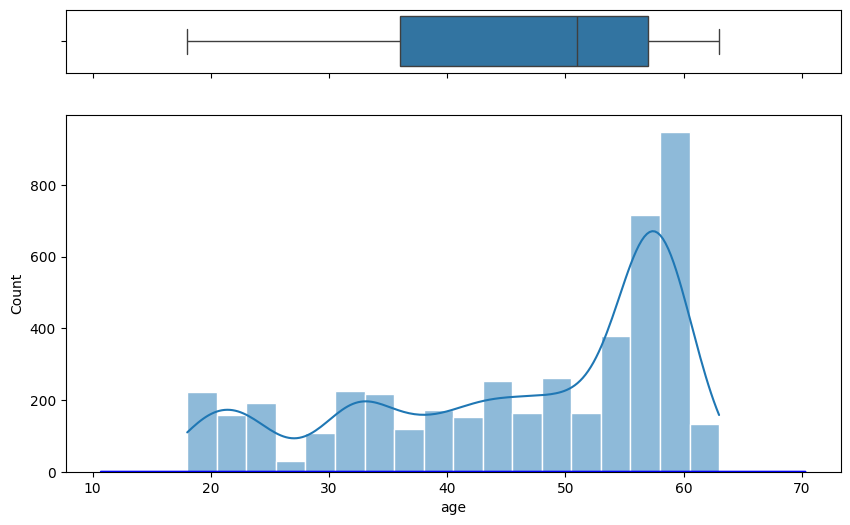

In [ ]:
f, (ax_box, ax_hist) = plt.subplots(2, sharex=True, gridspec_kw={'height_ratios': (.15, .85)}, figsize=(10, 6))
sns.set_style("darkgrid")

# Add a graph in each part
sns.boxplot(data=df, x="age", ax=ax_box)
sns.histplot(data=df, x="age", kde=True, ax=ax_hist)
sns.kdeplot(data=df, x="age", ax=ax_hist, color='blue')
ax_box.set(xlabel='Lead Age')

plt.show()

Observations: The distribution of age is skewed to the left with mean and median at 46 and 51 years respectively.
From the boxplot, we can see that there are no outliers

####2. Web Site Visits

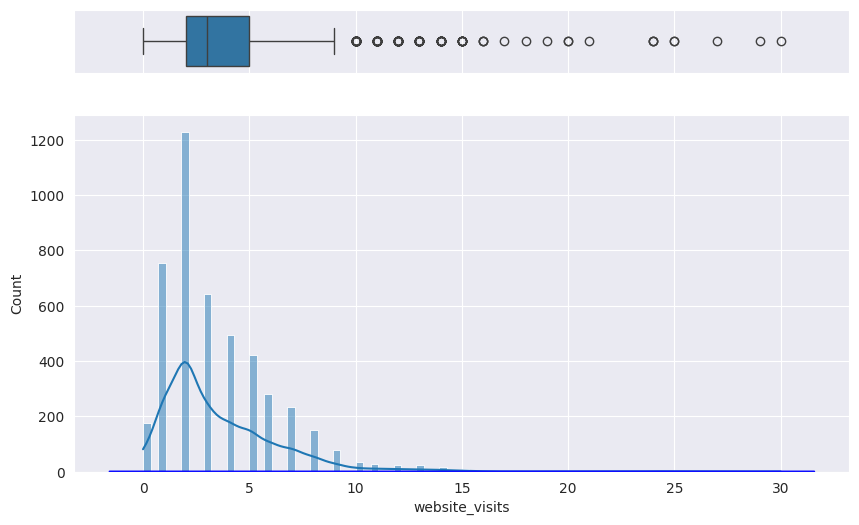

In [ ]:
f, (ax_box, ax_hist) = plt.subplots(2, sharex=True, gridspec_kw={'height_ratios': (.15, .85)}, figsize=(10, 6))
sns.set_style("darkgrid")

# Add a graph in each part
sns.boxplot(data=df, x="website_visits", ax=ax_box)
sns.histplot(data=df, x="website_visits", kde=True, ax=ax_hist)
sns.kdeplot(data=df, x="website_visits", ax=ax_hist, color='blue')
ax_box.set(xlabel='website_visits')

plt.show()

Observations: The distribution of web site visits is skewed to the right with mean and median at 3.6 and 3 visits respectively. From the boxplot, we can see that there are a few outliers

####3. Time Spent on Website

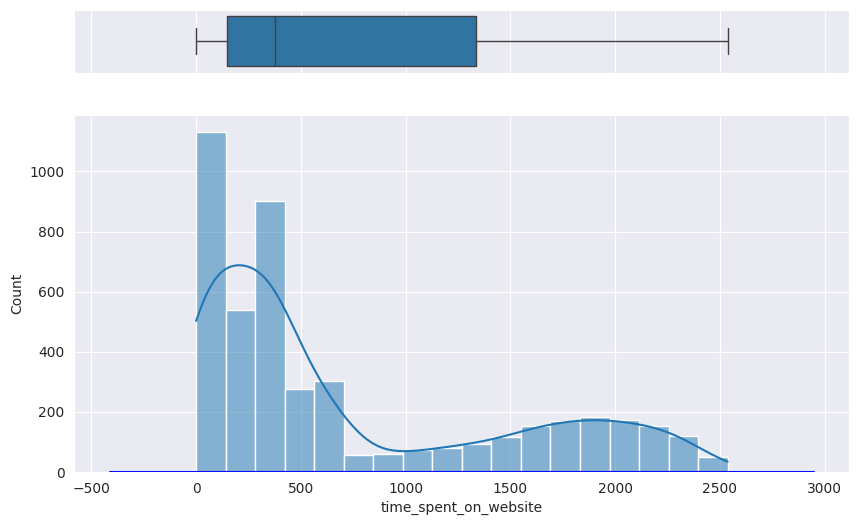

In [ ]:
f, (ax_box, ax_hist) = plt.subplots(2, sharex=True, gridspec_kw={'height_ratios': (.15, .85)}, figsize=(10, 6))
sns.set_style("darkgrid")

# Add a graph in each part
sns.boxplot(data=df, x="time_spent_on_website", ax=ax_box)
sns.histplot(data=df, x="time_spent_on_website", kde=True, ax=ax_hist)
sns.kdeplot(data=df, x="time_spent_on_website", ax=ax_hist, color='blue')
ax_box.set(xlabel='time spent on website')

plt.show()

Observations: The distribution of time spent on web site is skewed to the right with mean and median at 724 and 376 minutes respectively. From the boxplot, we can see that there are no outliers

####4. Page Views Per Visit

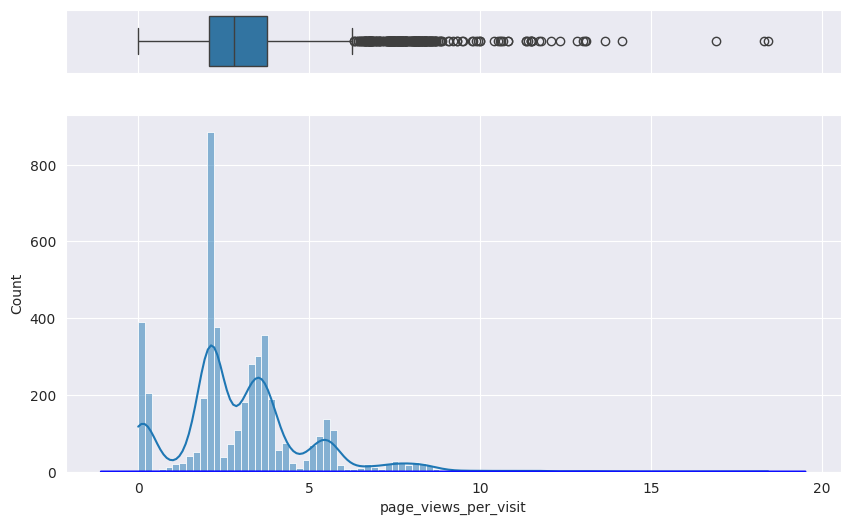

In [ ]:
f, (ax_box, ax_hist) = plt.subplots(2, sharex=True, gridspec_kw={'height_ratios': (.15, .85)}, figsize=(10, 6))
sns.set_style("darkgrid")

# Add a graph in each part
sns.boxplot(data=df, x="page_views_per_visit", ax=ax_box)
sns.histplot(data=df, x="page_views_per_visit", kde=True, ax=ax_hist)
sns.kdeplot(data=df, x="page_views_per_visit", ax=ax_hist, color='blue')
ax_box.set(xlabel='Page Views Per Visit')

plt.show()

Observations: The distribution of page views per visit is skewed to the right with mean and median at 3 and 2.8 views respectively. From the boxplot, we can see that there are a many outliers

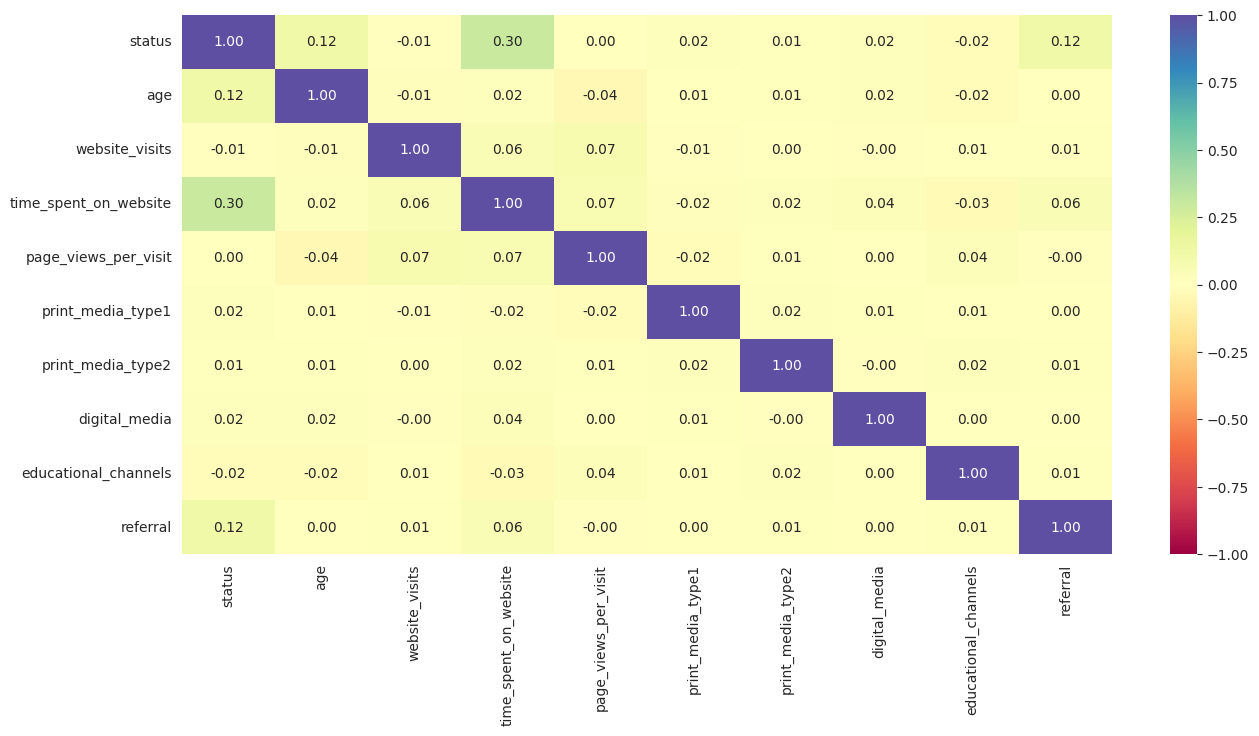

In [ ]:
# Assuming 'numeric_data' is your DataFrame with numerical features and 'status_encoded'
corr_matrix = numeric_data.corr()

# Reorder columns to put 'status' first
cols = ['status'] + [col for col in corr_matrix.columns if col != 'status']
reordered_corr_matrix = corr_matrix[cols].reindex(cols)

# Create the heatmap with the reordered correlation matrix
plt.figure(figsize=(15, 7))
sns.heatmap(reordered_corr_matrix, annot=True, vmin=-1, vmax=1, fmt=".2f", cmap="Spectral")
plt.show()

Observations:

Status shows a slight negative correlation with educational_channels.
There's a stronger positive correlation between time_spent_on_website and status and another slightly less positive correlation between status and age.

## Bivariate Analysis

Text(0, 0.5, 'Percentage Current Occupation %')

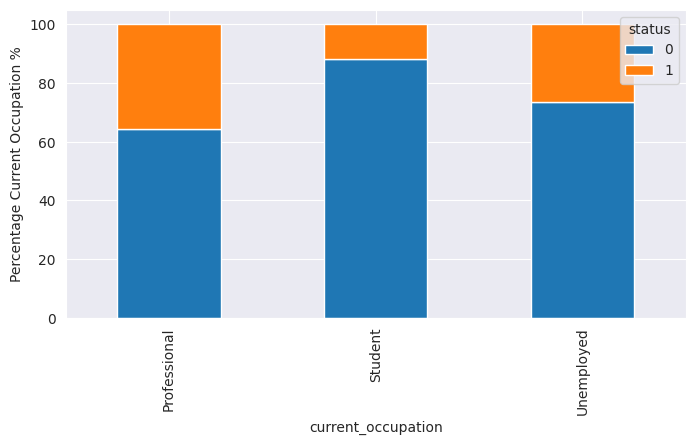

In [ ]:
(pd.crosstab(df['current_occupation'],df['status'],normalize='index')*100).plot(kind='bar',figsize=(8,4),stacked=True)
plt.ylabel('Percentage Current Occupation %')

Text(0, 0.5, 'Percentage First Interaction%')

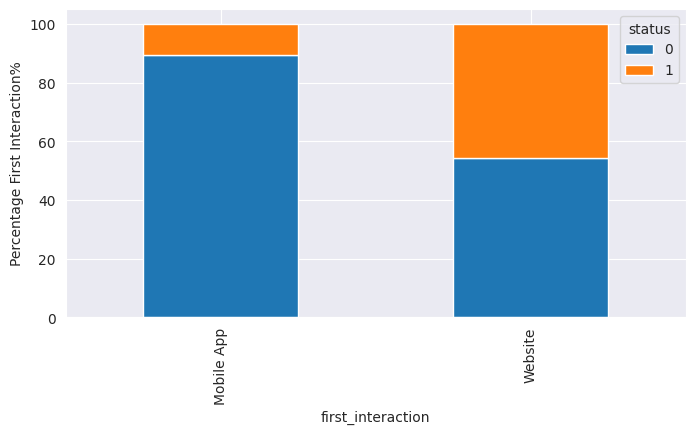

In [ ]:
(pd.crosstab(df['first_interaction'],df['status'],normalize='index')*100).plot(kind='bar',figsize=(8,4),stacked=True)
plt.ylabel('Percentage First Interaction%')

Text(0, 0.5, 'Percentage Last Activity %')

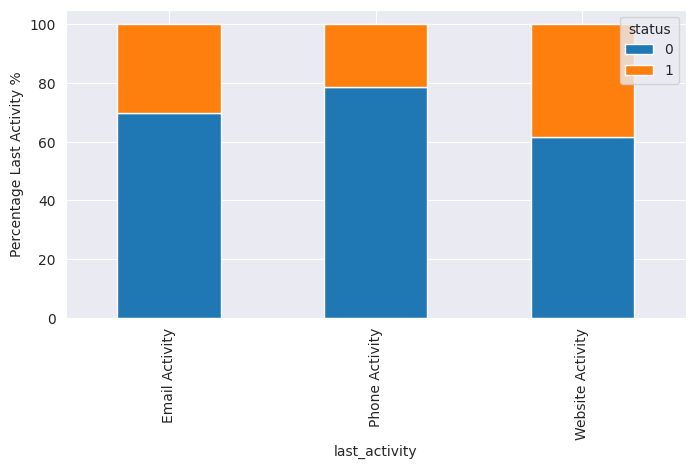

In [ ]:
(pd.crosstab(df['last_activity'],df['status'],normalize='index')*100).plot(kind='bar',figsize=(8,4),stacked=True)
plt.ylabel('Percentage Last Activity %')

Text(0, 0.5, 'Percentage Profile Completed %')

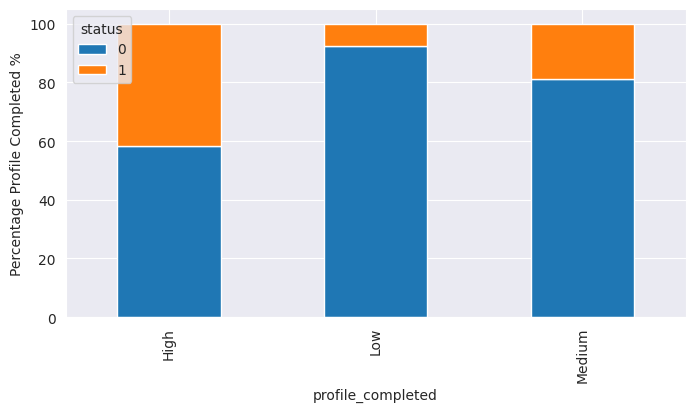

In [ ]:
(pd.crosstab(df['profile_completed'],df['status'],normalize='index')*100).plot(kind='bar',figsize=(8,4),stacked=True)
plt.ylabel('Percentage Profile Completed %')

Text(0, 0.5, 'Percentage referral %')

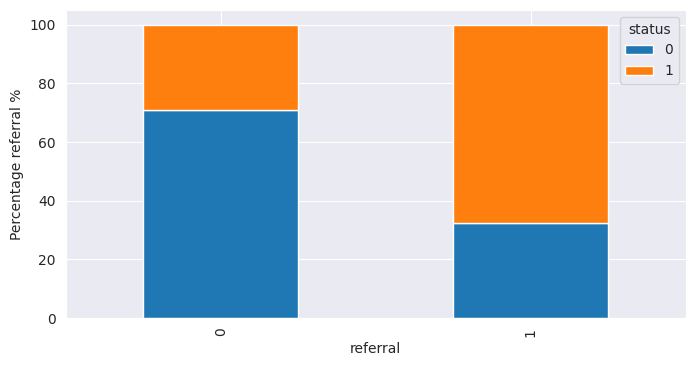

In [ ]:
(pd.crosstab(df['referral'],df['status'],normalize='index')*100).plot(kind='bar',figsize=(8,4),stacked=True)
plt.ylabel('Percentage referral %')

Text(0, 0.5, 'Percentage Newspaper %')

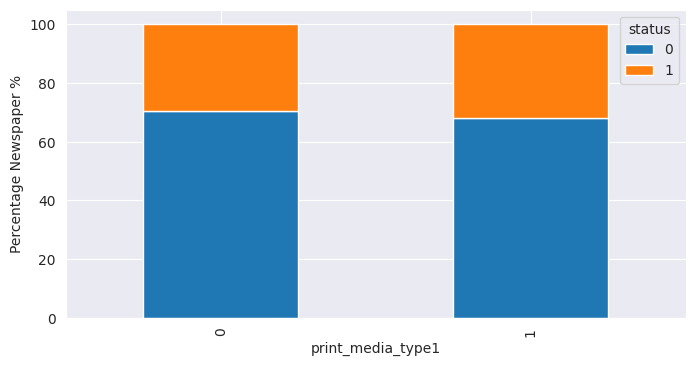

In [ ]:
(pd.crosstab(df['print_media_type1'],df['status'],normalize='index')*100).plot(kind='bar',figsize=(8,4),stacked=True)
plt.ylabel('Percentage Newspaper %')

Text(0, 0.5, 'Percentage Magazine %')

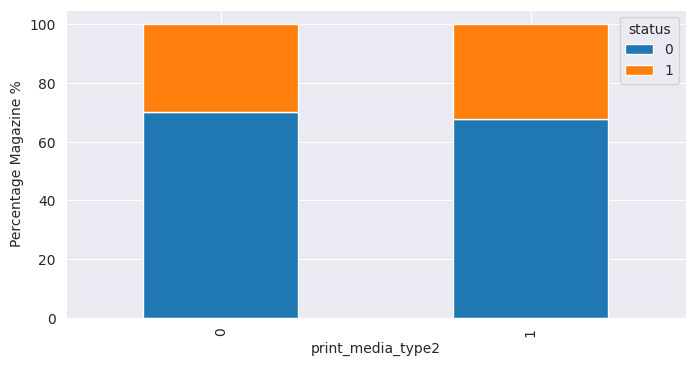

In [ ]:
(pd.crosstab(df['print_media_type2'],df['status'],normalize='index')*100).plot(kind='bar',figsize=(8,4),stacked=True)
plt.ylabel('Percentage Magazine %')

Text(0, 0.5, 'Percentage Digital Media %')

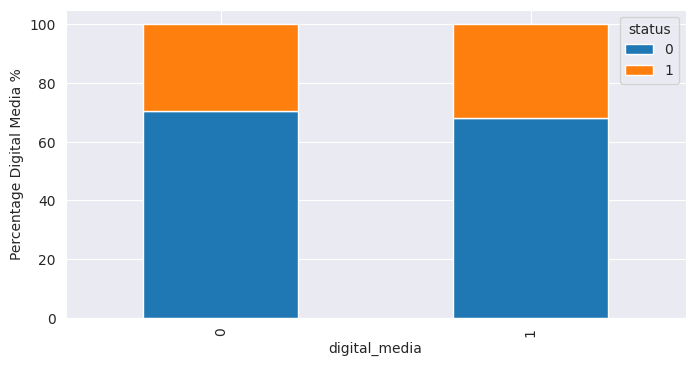

In [ ]:
(pd.crosstab(df['digital_media'],df['status'],normalize='index')*100).plot(kind='bar',figsize=(8,4),stacked=True)
plt.ylabel('Percentage Digital Media %')

Text(0, 0.5, 'Percentage Educational Channels %')

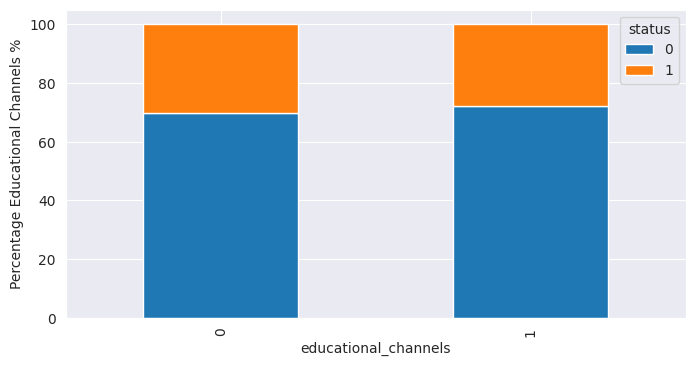

In [ ]:
(pd.crosstab(df['educational_channels'],df['status'],normalize='index')*100).plot(kind='bar',figsize=(8,4),stacked=True)
plt.ylabel('Percentage Educational Channels %')

Leads have different expectations from the outcome of the course and professionals followed by unemployed people have more conversions as compared to current students.  
Websites as first channels of interaction, have the most impact on the lead status.
The company uses multiple modes to interact with prospects but email interactions work best.
The company gets leads from various channels such as print media, digital media, referrals,..however education channels have the highest lead conversion rate.
Having more details about a prospect increases the chances of conversion.




### **Let's find the percentage of outliers, in each column of the data, using IQR.**

In [ ]:
numeric_data = df.select_dtypes(include=['float64', 'int64'])

# Calculate quartiles and IQR
Q1 = numeric_data.quantile(0.25)
Q3 = numeric_data.quantile(0.75)
IQR = Q3 - Q1

# Find lower and upper bounds for outliers
lower = Q1 - 1.5 * IQR
upper = Q3 + 1.5 * IQR

In [ ]:
(
    (df.select_dtypes(include=["float64", "int64"]) < lower)
    | (df.select_dtypes(include=["float64", "int64"]) > upper)
).sum() / len(data) * 100

,0
age,0.00000
website_visits,3.33912
time_spent_on_website,0.00000
page_views_per_visit,5.57242
print_media_type1,10.77624
print_media_type2,5.05204
digital_media,11.42671
educational_channels,15.28621
referral,2.01648
status,0.00000


**Observations:**
* After identifying outliers, we decide not to treat them as there will be outliers in real case scenario and we would want our model to learn the underlying pattern for such customers.

In [ ]:
data1 = df.copy()

Separating the independent variables (X) and the dependent variable (Y)

In [ ]:
X = data1.drop(["status"], axis=1)
y = data1["status"]

**Splitting the data into 70% train and 30% test set**

Some classification problems can exhibit a large imbalance in the distribution of the target classes: for instance there could be several times more negative samples than positive samples. In such cases it is recommended to use the **stratified sampling** technique to ensure that relative class frequencies are approximately preserved in each train and validation fold.

In [ ]:
# Splitting the data
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=1,stratify=y)

In [ ]:
# Checking that no column has missing values in train or test sets
print(X_train.isna().sum())
print("-" * 30)
print(X_test.isna().sum())

age                      0
current_occupation       0
first_interaction        0
profile_completed        0
website_visits           0
time_spent_on_website    0
page_views_per_visit     0
last_activity            0
print_media_type1        0
print_media_type2        0
digital_media            0
educational_channels     0
referral                 0
dtype: int64
------------------------------
age                      0
current_occupation       0
first_interaction        0
profile_completed        0
website_visits           0
time_spent_on_website    0
page_views_per_visit     0
last_activity            0
print_media_type1        0
print_media_type2        0
digital_media            0
educational_channels     0
referral                 0
dtype: int64


In [ ]:
cols = X_train.select_dtypes(include=["object", "category"])
for i in cols.columns:
    print(X_train[i].value_counts())
    print("*" * 30)

current_occupation
Professional    1844
Unemployed       996
Student          388
Name: count, dtype: int64
******************************
first_interaction
Website       1770
Mobile App    1458
Name: count, dtype: int64
******************************
profile_completed
High      1580
Medium    1570
Low         78
Name: count, dtype: int64
******************************
last_activity
Email Activity      1581
Phone Activity       837
Website Activity     810
Name: count, dtype: int64
******************************


###Encoding Categorical variables

In [ ]:
X_train = pd.get_dummies(X_train, drop_first=True)
X_test = pd.get_dummies(X_test, drop_first=True)
print(X_train.shape, X_test.shape)

(3228, 16) (1384, 16)


Observations: After encoding there are 16 columns

In [ ]:
X_train.head()

,age,website_visits,time_spent_on_website,page_views_per_visit,print_media_type1,print_media_type2,digital_media,educational_channels,referral,current_occupation_Student,current_occupation_Unemployed,first_interaction_Website,profile_completed_Low,profile_completed_Medium,last_activity_Phone Activity,last_activity_Website Activity
389,57,1,582,2.19700,0,0,0,1,0,False,False,False,False,False,False,False
1162,35,2,1937,5.11100,0,0,1,0,0,False,True,True,False,True,False,False
1057,53,5,1554,2.12300,0,0,0,1,0,False,True,True,False,True,False,False
436,52,7,15,4.38200,0,0,0,0,0,False,False,True,False,False,False,False
946,57,0,0,0.00000,1,0,0,0,0,False,False,True,False,False,False,False


##Model Evaluation Criterion

The model can make two types of wrong predictions:

Predicting a customer will convert and the customer doesn't convert.
Predicting a customer will not convert and the customer converts.
Which case is more important?

Predicting that customer will not convert but they convert i.e. losing on a valuable customer or asset.
How to reduce this loss i.e the need to reduce False Negatives?

Extraalearn would want Recall to be maximized, greater the Recall higher the chances of minimizing false negatives. Hence, the focus should be on increasing Recall or minimizing the false negatives or in other words identifying the true positives (i.e. Class 1) so that the organization can gain their valuable customers.

In [ ]:
 #Creating metric function

def metrics_score(actual, predicted):
    print(classification_report(actual, predicted))
    cm = confusion_matrix(actual, predicted)
    plt.figure(figsize=(8,5))
    sns.heatmap(cm, annot=True,  fmt='.2f', xticklabels=['Not Converted', 'Convert'], yticklabels=['Not Converted', 'Convert'])
    plt.ylabel('Actual')
    plt.xlabel('Predicted')
    plt.show()

## Building a Decision Tree model

In [ ]:
# Building decision tree model

model_dt= DecisionTreeClassifier(random_state=1,max_depth=8)
model_dt.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=8, random_state=1)

**Let's check the model performance**

              precision    recall  f1-score   support

           0       0.94      0.91      0.92      2264
           1       0.80      0.87      0.83       964

    accuracy                           0.90      3228
   macro avg       0.87      0.89      0.88      3228
weighted avg       0.90      0.90      0.90      3228



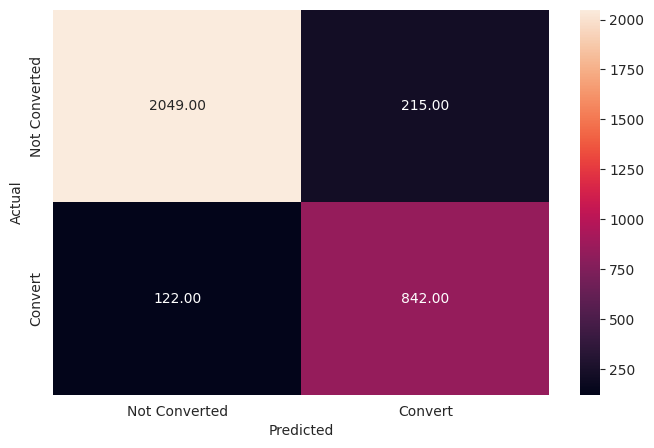

In [ ]:
# Checking performance on the training dataset

pred_train_dt = model_dt.predict(X_train)

metrics_score(y_train, pred_train_dt)

Observation:

Model has performed very well on the training set.
As we know a decision tree will continue to grow and classify each data point correctly if no restrictions are applied as the trees will learn all the patterns in the training set.
Let's check the performance on test data to see if the model is overfitting.

              precision    recall  f1-score   support

           0       0.91      0.87      0.89       971
           1       0.72      0.79      0.75       413

    accuracy                           0.85      1384
   macro avg       0.81      0.83      0.82      1384
weighted avg       0.85      0.85      0.85      1384



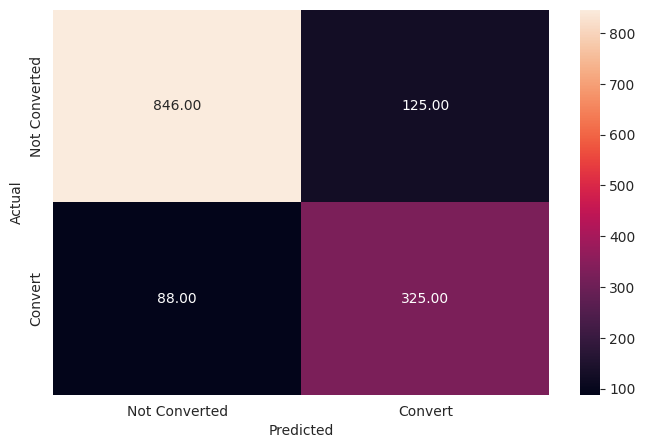

In [ ]:
pred_test_dt = model_dt.predict(X_test)
metrics_score(y_test, pred_test_dt)

**Observation:**
* The decision tree model is not overfitting.

**Let's visualize the decision tree** and observe the decision rules:

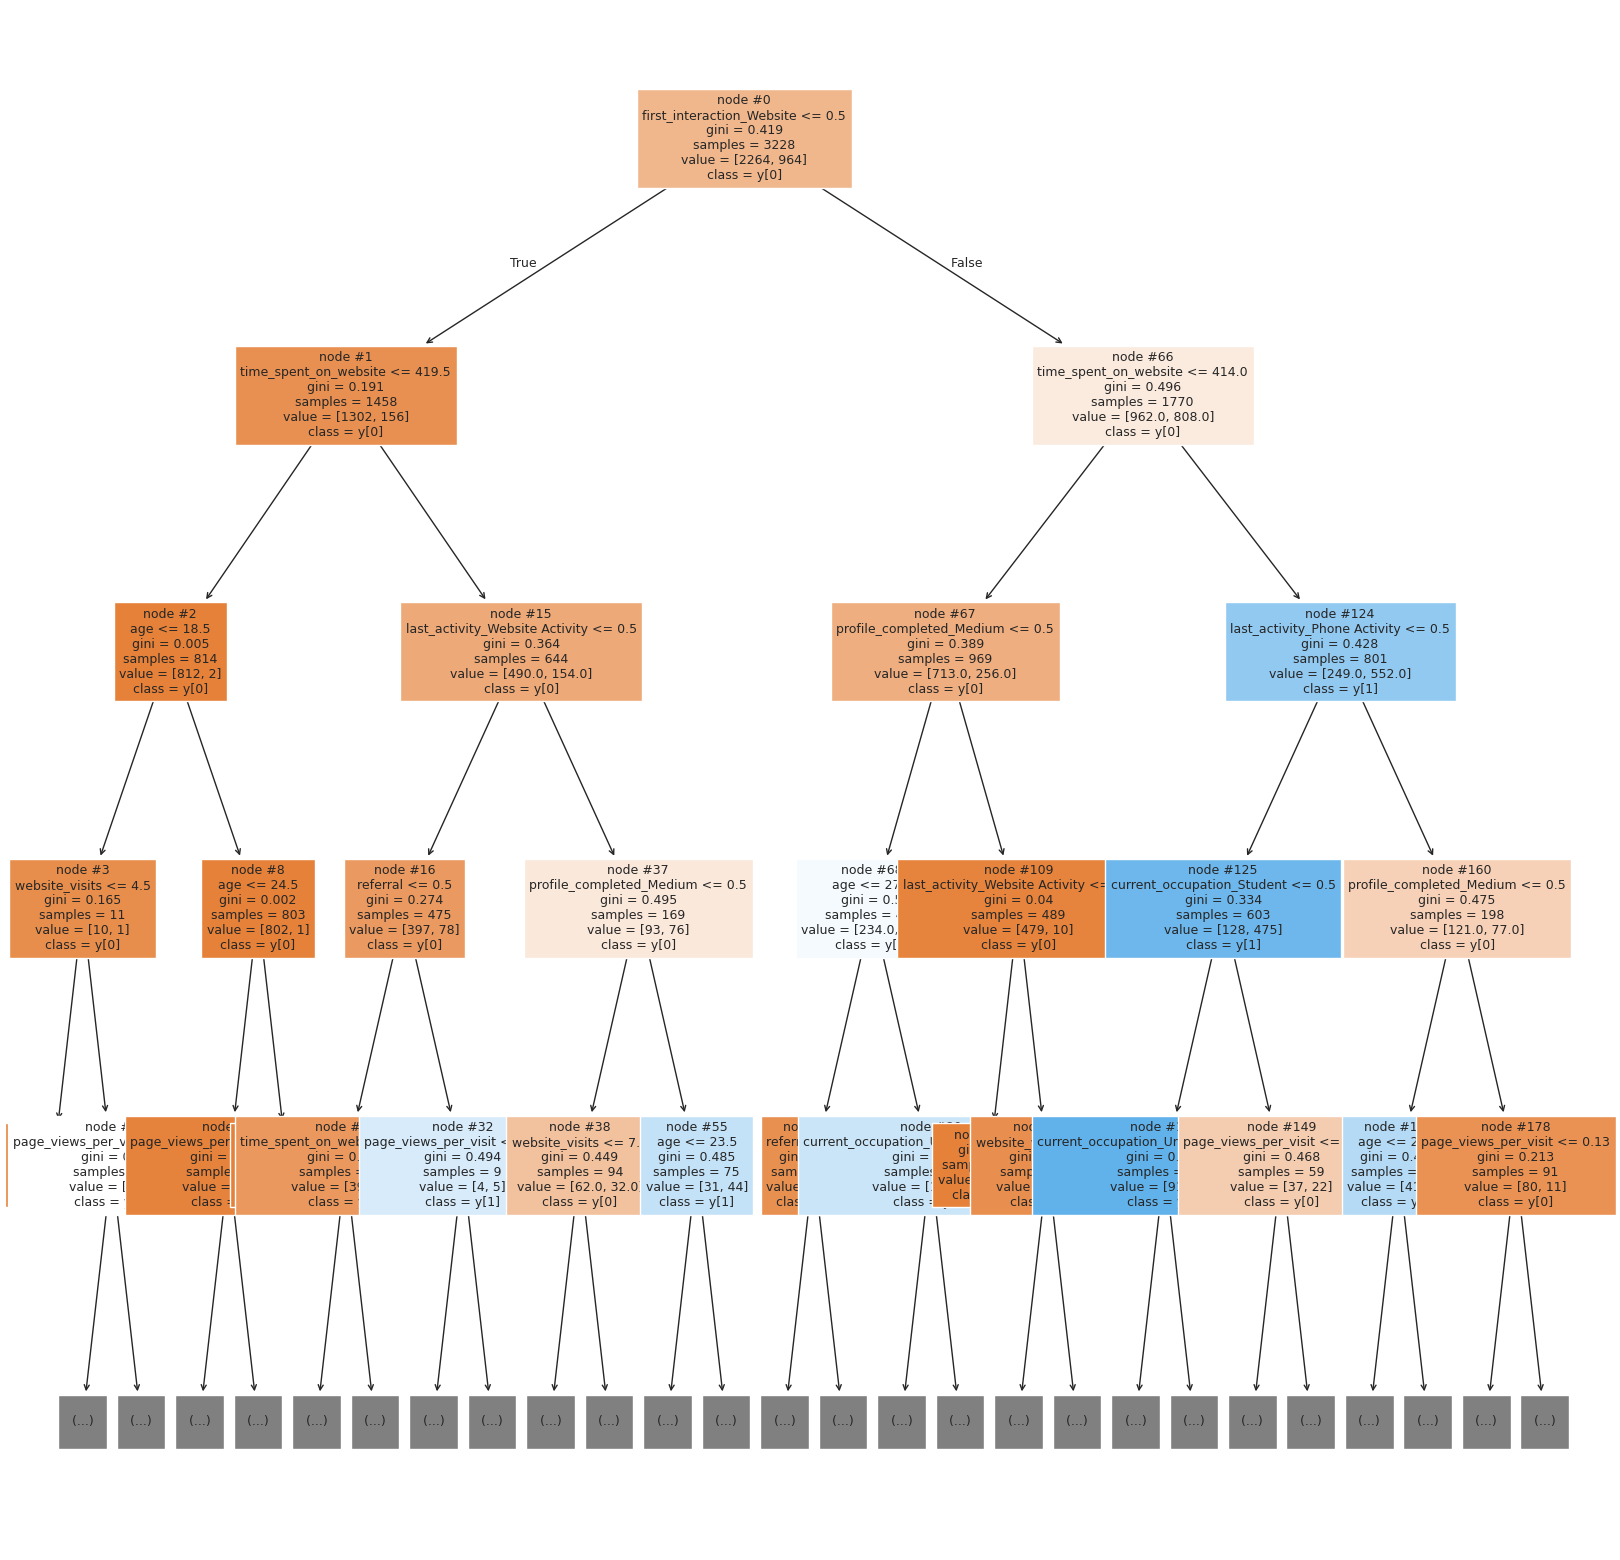

In [ ]:
features = list(X_train.columns)

plt.figure(figsize=(20,20))
from sklearn import tree
tree.plot_tree(model_dt,feature_names=features,max_depth =4, filled=True,fontsize=9,node_ids=True,class_names=True)
plt.show()

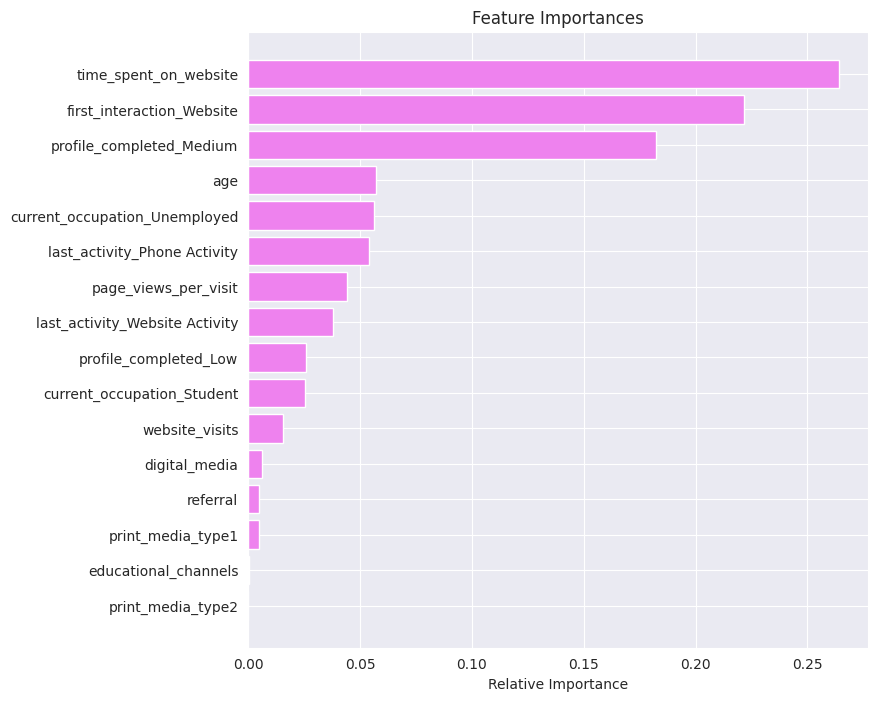

In [ ]:
# Importance of features in the tree building

feature_names = list(X_train.columns)
importances = model_dt.feature_importances_
indices = np.argsort(importances)

plt.figure(figsize=(8, 8))
plt.title("Feature Importances")
plt.barh(range(len(indices)), importances[indices], color="violet", align="center")
plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
plt.xlabel("Relative Importance")
plt.show()

**Observation:**
- **So,time_spent_on_website,  is the most important feature** **followed by first_interaction_website and profile_completed_medium** which makes sense. Customers who have  more interactions with the site have higher chance of conversion.
- **age, current_occupation_unemployed, last_activity_phone_activity are also  important factors** .

## Do we need to prune the tree?

The tree is not overfitting and does not need pruning.

## Building a Random Forest model

In [ ]:
# Fitting the Random Forest classifier on the training data
rf_estimator = RandomForestClassifier(random_state = 1)

rf_estimator.fit(X_train, y_train)

RandomForestClassifier(random_state=1)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      2264
           1       1.00      1.00      1.00       964

    accuracy                           1.00      3228
   macro avg       1.00      1.00      1.00      3228
weighted avg       1.00      1.00      1.00      3228



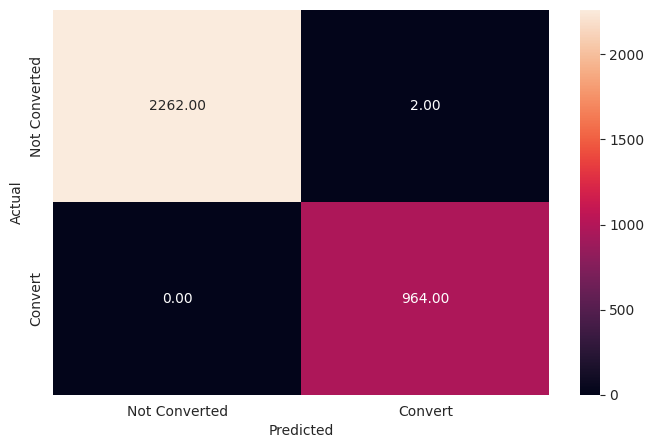

In [ ]:
# Checking performance on the training data
y_pred_train_rf = rf_estimator.predict(X_train)

metrics_score(y_train, y_pred_train_rf)

**Observation:**
- For all the metrics in the training dataset, the Random Forest gives a 100% score.

              precision    recall  f1-score   support

           0       0.89      0.92      0.91       971
           1       0.79      0.74      0.77       413

    accuracy                           0.86      1384
   macro avg       0.84      0.83      0.84      1384
weighted avg       0.86      0.86      0.86      1384



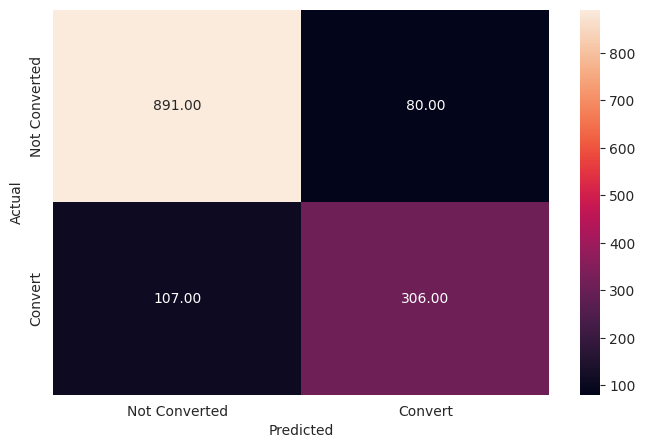

In [ ]:
# Checking performance on the testing data
y_pred_test_rf = rf_estimator.predict(X_test)

metrics_score(y_test, y_pred_test_rf)

**Observations:**

- The Random Forest classifier **seems to be overfitting the training data**. The recall on the training data is 1, while the recall on the test data is only ~ 0.74 for class 1.
- Precision is high for the test data as well.


**Let's check the importance of the features**

<Axes: xlabel='Importance', ylabel='None'>

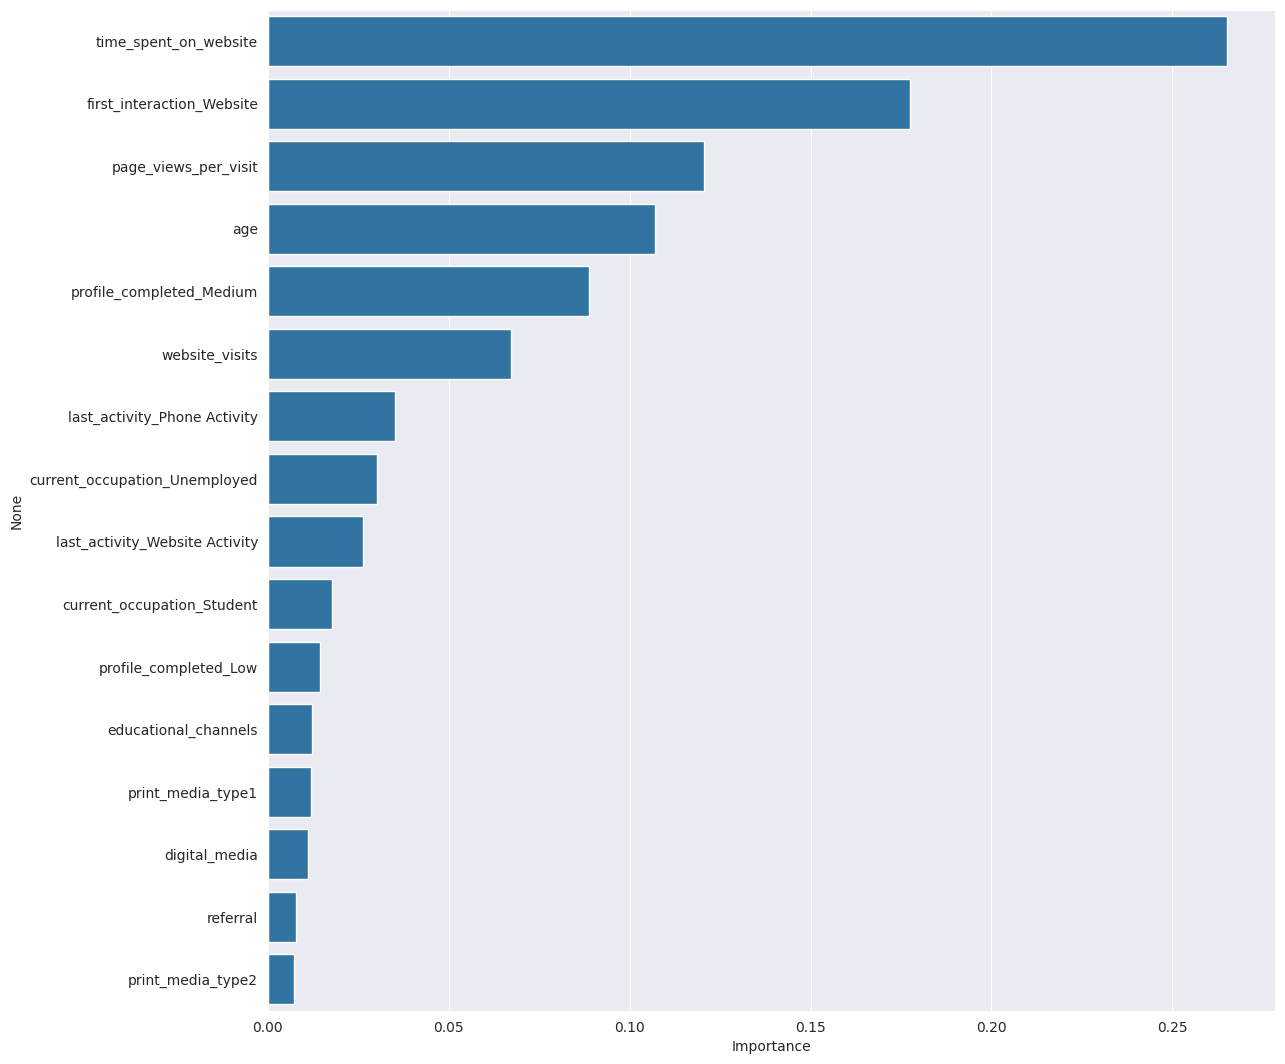

In [ ]:
importances = rf_estimator.feature_importances_

columns = X_train.columns

importance_df = pd.DataFrame(importances, index = columns, columns = ['Importance']).sort_values(by = 'Importance', ascending = False)

plt.figure(figsize = (13, 13))

sns.barplot(x = importance_df.Importance, y = importance_df.index)

**Observations:**
- The Random Forest further verifies the results from the decision tree that the most important features are `time_spent_on_website` and `first_interaction_website`.

## Do we need to prune the tree?

Pruning is not typically needed for random forests as they use bagging, bootstrap aggregating, which involves creating multiple decision trees from different subsets of the training data other methods are random feature selection and ensemble averaging. Yes, it is overfitting but I would use hyperparameter tuning instead of pruning.

## Actionable Insights and Recommendations

* We have been able to build a predictive model:

  a) that the organization can deploy to identify leads who would not convert.
  
  b) that the organization can use to find the key causes that drive lead conversion into becoming students.
  
  c) based on which the organizaton can take appropriate actions to build better attractive practices for potential customers.
  

* Factors that drive conversion - time_spent_on_website, first_interaction_website, page_views_per_visit, profile_complete_medium.

* Highest conversion is highly correlated with the organization's website. Five of the top features: time_spent_on_website, first_interaction_website,Page_views_per_visit, Profile_completed_medium, and Website_visits are some of the strongest indicators that the lead would become a customer.  Provide more information on the website so that web traffic can learn as much as possible about their interests and the opportunities in order to draw more customers. Improve the user experience on the website as opposed to the mobile appolication to attract even more potential customers as leads prefer to use the website. Create unique user experience for those with completed profiles with unique information based on their page visits. Create an active bot that can answer consumer questions if they have them as well as a help-line.
